# Intro to numpy

- `numpy` stands for numerical python
- the `numpy` library is optimized for linear algebra routines, and is very fast
- the starring role is played by the `ndarray`, which is a vector
- `pandas` is built on `numpy`
- documentation is available on [numpy.org](http://www.numpy.org/)

In [1]:
import numpy as np  # numpy is always aliased as 'np'

### ndarray

An `ndarray` is very similar to a list...

In [2]:
l = [3, 4.7, 2, 0, 1.2, 1]
print l, type(l)

[3, 4.7, 2, 0, 1.2, 1] <type 'list'>


In [3]:
a = np.array(l)
print a, type(a)

[ 3.   4.7  2.   0.   1.2  1. ] <type 'numpy.ndarray'>


In [4]:
a[0]

3.0

In [5]:
a[2:6]

array([ 2. ,  0. ,  1.2,  1. ])

In [6]:
a[-2:]

array([ 1.2,  1. ])

In [7]:
a[::-1]  # reverse order

array([ 1. ,  1.2,  0. ,  2. ,  4.7,  3. ])

...but a little bit fancier...

In [8]:
a[2:4] = 0
a

array([ 3. ,  4.7,  0. ,  0. ,  1.2,  1. ])

In [9]:
a[2:4] = a[0:2]
a

array([ 3. ,  4.7,  3. ,  4.7,  1.2,  1. ])

In [10]:
a[-2:] += 3
a

array([ 3. ,  4.7,  3. ,  4.7,  4.2,  4. ])

In [11]:
a[-2:] *= a[:2]
a

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

... and it behaves like a vector:

In [12]:
b = 3 * a
b

array([  9. ,  14.1,   9. ,  14.1,  37.8,  56.4])

In [13]:
1 + a

array([  4. ,   5.7,   4. ,   5.7,  13.6,  19.8])

In [14]:
a + b

array([ 12. ,  18.8,  12. ,  18.8,  50.4,  75.2])

In [15]:
a * b   # element-wise multiplication

array([   27.  ,    66.27,    27.  ,    66.27,   476.28,  1060.32])

In [16]:
a ** 2  # element-wise multiplication

array([   9.  ,   22.09,    9.  ,   22.09,  158.76,  353.44])

In [17]:
a.dot(b)  # dot product

1723.1400000000003

Note that division by zero raises a warning only, and puts an `inf` in the vector.

In [18]:
1. / a  # element-wise division

array([ 0.33333333,  0.21276596,  0.33333333,  0.21276596,  0.07936508,
        0.05319149])

**Vectorization vs broadcasting**
- Using `numpy` arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require *writing loops*. 
- This practice of replacing explicit loops with array expressions is commonly referred to as *vectorization*. 
- In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.
- Any arithmetic operations between equal-size arrays applies the operation elementwise
- Broadcasting describes how arithmetic works between arrays of different shapes. It is a very powerful feature, but one that can be easily misunderstood, even by experienced users. The simplest example of broadcasting occurs when combining a scalar value with an array.

McKinney, Wes (2012-10-08). _Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython_ (p. 97). O'Reilly Media. Kindle Edition. 

In [19]:
print a * b   # vectorization: element-wise multiplication
print a * 3   # broadcasting

[   27.      66.27    27.      66.27   476.28  1060.32]
[  9.   14.1   9.   14.1  37.8  56.4]


### Typing

Also note that all elements of an `ndarray` have the same type

In [20]:
a.dtype

dtype('float64')

In [21]:
np.array([1,2,3])

array([1, 2, 3])

In [22]:
np.array([1,2.0,3])

array([ 1.,  2.,  3.])

In [23]:
np.array([1,2,"3"])

array(['1', '2', '3'], 
      dtype='|S21')

- It is often necessary to recast data types from one type to another. 
- This is especially handy when converting data to float after reading a text file.
- Note that `astype` creates a new copy of the array.

In [24]:
a

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

In [25]:
a.astype(int)

array([ 3,  4,  3,  4, 12, 18])

In [26]:
b = a.astype(str)
b

array(['3.0', '4.7', '3.0', '4.7', '12.6', '18.8'], 
      dtype='|S32')

In [27]:
b.astype(float)

array([  3. ,   4.7,   3. ,   4.7,  12.6,  18.8])

### Shape and reshaping

In [28]:
len(a)  # get number of elements in ndarray (just like a list)

6

In [29]:
a.shape  # `shape` gives you a tuple with the length in each dimension

(6,)

In [30]:
len(a.shape)  # This is a way to find out the dimension of your vextor or matrix

1

In [31]:
a.ndim  # This is a better way to find that out

1

Let's transform our vector into a 2x3 matrix.

In [32]:
A = a.reshape(2,3)  
A

array([[  3. ,   4.7,   3. ],
       [  4.7,  12.6,  18.8]])

In [33]:
A.shape  # a 2x3 matrix

(2, 3)

In [34]:
len(A.shape)  # this is 2-dimensional

2

In [35]:
A.ndim

2

### Standard arrays

There are a number of helper functions to create arrays from scratch

In [36]:
a = np.zeros(10)
a

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

You can specify the type, if desired.

In [37]:
a1 = np.zeros(5, dtype=np.int)
a2 = np.zeros(5, dtype=np.float)
a3 = np.ones(5, dtype=np.int)
a4 = np.ones(5, dtype=np.float)
print a1, a2, a3, a4

[0 0 0 0 0] [ 0.  0.  0.  0.  0.] [1 1 1 1 1] [ 1.  1.  1.  1.  1.]


Or create a matrix of ones or zeros.

In [38]:
A = np.zeros((4, 9))
A

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

- You can create a range with `np.arange`
- Note the difference with python's `range`, which creates a list

In [39]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [41]:
np.arange(5, 10, 2)

array([5, 7, 9])

- Use `np.linspace` for creating evenly spaced numbers over a specified interval
- Note that the boundaries are _included_ in `linspace`, but not in `arange` (or `range` for that matter)

In [42]:
np.linspace(5, 10, 10)

array([  5.        ,   5.55555556,   6.11111111,   6.66666667,
         7.22222222,   7.77777778,   8.33333333,   8.88888889,
         9.44444444,  10.        ])

### Random arrays

Often you'll need a bunch of random numbers.

In [43]:
np.random.random()  # give a random number in the interval [0.0, 1.0).

0.3481647734972374

In [44]:
np.random.random(10)  # idem, in a vector with 10 elements

array([ 0.55983038,  0.258762  ,  0.50015887,  0.1811552 ,  0.9067769 ,
        0.5770029 ,  0.67325829,  0.66531693,  0.62077211,  0.97426723])

In [45]:
np.random.random((4, 3))  # random 4x3 matrix

array([[ 0.04931935,  0.99341873,  0.82950284],
       [ 0.02807643,  0.27979915,  0.06845442],
       [ 0.77259436,  0.73585575,  0.65349127],
       [ 0.25124292,  0.06250834,  0.98863056]])

These random numbers are uniformly distributed:

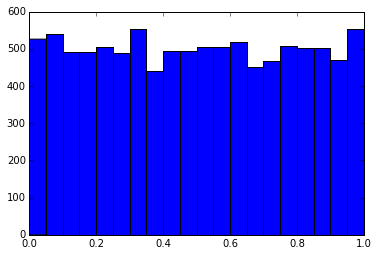

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
a = np.random.random(10000)
f = plt.hist(a, bins=20)

But other distributions are available.

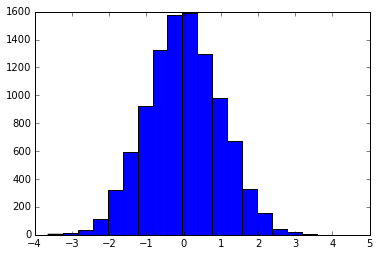

In [47]:
a = np.random.randn(10000)  # Normal distribution
f = plt.hist(a, bins=20)

Permutations and combinations are supported.

In [48]:
abc = list('ABCDEFGHI')
print np.random.permutation(10)
print np.random.permutation(abc)
print np.random.choice(10)
print np.random.choice(abc)
print np.random.choice(abc, 5, replace=True)
print np.random.choice(abc, 5, replace=False)

[9 5 6 3 7 0 2 8 4 1]
['I' 'E' 'C' 'H' 'D' 'A' 'F' 'B' 'G']
9
E
['B' 'F' 'I' 'I' 'B']
['C' 'D' 'A' 'E' 'G']


See [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html)
for more information.

### Performance

Note that vectorization not only makes your processing precise but also fast.

In [49]:
N = 1000
a = np.random.random(N)  # numpy array
l = list(a)  # python list

In [50]:
%time b = np.square(a)

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 16 µs


In [51]:
%time m = [elt ** 2 for elt in l]

CPU times: user 294 µs, sys: 146 µs, total: 440 µs
Wall time: 345 µs


Pandas is built on top of numpy. It's faster than common python, but slower than numpy.

In [52]:
import pandas as pd
s = pd.Series(a)  # a pandas series
%time t = np.square(s)

CPU times: user 84 µs, sys: 4 µs, total: 88 µs
Wall time: 92 µs


As a side note, for comparing runtimes, people usually use `%timeit` instead of `%time`, since it measures a few loops at once.

In [53]:
%timeit b = np.square(a)
%timeit m = [elt ** 2 for elt in l]
%timeit t = np.square(s)

The slowest run took 8.57 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.33 µs per loop
10000 loops, best of 3: 177 µs per loop
10000 loops, best of 3: 28.4 µs per loop


For timing the entire cell, use `%%time` or `%%timeit`.

In [54]:
%%timeit
alpha = a.dot(a)
alpha += 1

The slowest run took 63.35 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.34 µs per loop


### Sorting

In [55]:
a = np.random.random(10)
a.sort()  # sorts in-place
print a

[ 0.03679136  0.20225432  0.27768222  0.31996892  0.32442659  0.41602728
  0.59553188  0.6101433   0.62936414  0.7799444 ]


Note that the sort is _in-place_, so you can't do a `print a.sort()` or something. This is a bit confusing.

In [56]:
print a.sort()

None


Matrices can be sorted, too.

In [57]:
M = np.random.random((3, 4))
M.sort()  # sort elements in each column
M

array([[ 0.219181  ,  0.6033107 ,  0.77771078,  0.90028731],
       [ 0.32301424,  0.65100706,  0.80019694,  0.94673707],
       [ 0.26492187,  0.35797982,  0.8739972 ,  0.94271527]])

In [58]:
M = np.random.random((3, 4))
M.sort(axis=1)  # sort elements in each row
M

array([[ 0.02989827,  0.43369081,  0.49234965,  0.92794988],
       [ 0.29609875,  0.66312341,  0.82710606,  0.89693939],
       [ 0.2675162 ,  0.50272078,  0.57195336,  0.78827153]])

Find unique elements in an array

In [59]:
a = np.random.choice(abc, 100)
a

array(['E', 'C', 'C', 'H', 'D', 'H', 'C', 'H', 'D', 'F', 'A', 'G', 'H',
       'A', 'H', 'I', 'I', 'A', 'F', 'C', 'C', 'D', 'G', 'A', 'C', 'F',
       'D', 'H', 'G', 'E', 'H', 'H', 'B', 'D', 'B', 'I', 'D', 'I', 'G',
       'A', 'I', 'G', 'F', 'D', 'B', 'E', 'B', 'D', 'E', 'F', 'D', 'C',
       'H', 'D', 'I', 'D', 'G', 'H', 'G', 'G', 'I', 'F', 'G', 'G', 'D',
       'G', 'A', 'F', 'H', 'G', 'H', 'I', 'I', 'F', 'C', 'I', 'C', 'F',
       'C', 'H', 'C', 'H', 'G', 'C', 'C', 'G', 'F', 'C', 'A', 'I', 'H',
       'H', 'B', 'C', 'C', 'H', 'A', 'E', 'A', 'C'], 
      dtype='|S1')

In [60]:
print np.unique(a)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I']


In [61]:
set(a)  # should give the same, in a set format

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'}

In [62]:
uniques, counts = np.unique(a, return_counts=True)  # count the occurances of each unique element
print zip(uniques, counts)

[('A', 9), ('B', 5), ('C', 17), ('D', 12), ('E', 5), ('F', 10), ('G', 14), ('H', 17), ('I', 11)]


### Some math

In [63]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [64]:
np.square(a)

array([ 0,  1,  4,  9, 16])

In [65]:
np.sqrt(a)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ])

In [66]:
a.mean()

2.0

In [67]:
a.std()  # standard deviation

1.4142135623730951

In [68]:
print a.min(), a.max()

0 4


In [69]:
a.sum()

10

In [70]:
a.cumsum()

array([ 0,  1,  3,  6, 10])

<hr>

# Exercises

- Create an 3x4-matrix with only zeros
- Create a 6x6-matrix with ones on the diagonal - i.e., on (1,1), (2,2), etc, - and zeros everywhere else. 
- Create a 5x3-matrix with uniformly random values between 1 and 10
- Create an array with 1000 random values form the standard normal distribution
- Given the following matrix $M$, compute the mean of each row, of each column, and of all of $M$.